<a href="https://colab.research.google.com/github/tegerte/1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import seaborn as sb
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout


import requests
from PIL import Image
import cv2

np.random.seed(0)

In [2]:
sb.set_theme(style="darkgrid")
np.random.seed(0)
num_f_samples = []
cols = 10
num_classes = 10

sb.set_theme(style="darkgrid")
#  Learning rate
LR = 0.01
n_pts=500
# Nmber of epochs
EP = 10
#Batch size
BS = 400
#  Validation split
VS=0.1

In [3]:
def plot_controlgraphs(hist, incl_validation = False):
  plt.plot(hist.history['accuracy'],label='accuracy')
  plt.plot(hist.history['loss'],label='loss')
  if incl_validation:
    plt.plot(hist.history['val_loss'],label='val_loss')
    plt.plot(hist.history['val_accuracy'],label='val_acc')
  plt.title(str('accuracy and loss'))
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

## Load data and check

In [4]:
(X_train, y_train),(X_test, y_test_raw) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test_raw.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


## Print it

In [5]:
num_f_samples = {}
num_classes = 10
#fig, ax = plt.subplots(nrows=num_classes, ncols=cols, figsize=(12,12))
#fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_sel = X_train[y_train==j]
    #ax[j][i].axis('off')
    #ax[j][i].imshow(x_sel[random.randint(0,len(x_sel-1)),:,:], cmap='Greys')
    if i ==2:
      num_f_samples[j]=(len(x_sel))
    
   

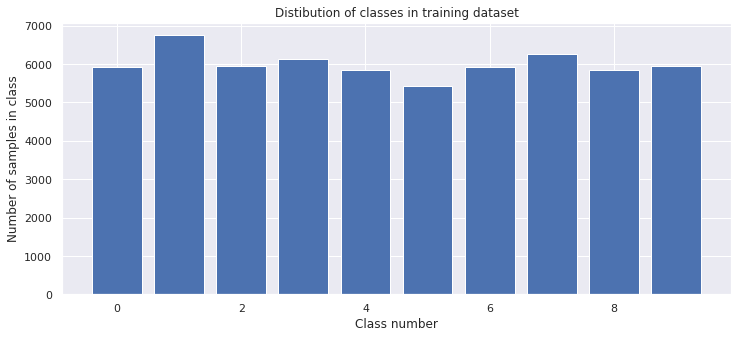

In [6]:
plt.figure(figsize=(12,5))
#plt.bar(num_f_samples.keys(), num_f_samples.values())
plt.bar(*zip(*num_f_samples.items()))
plt.xlabel('Class number')
plt.ylabel('Number of samples in class')
plt.title('Distibution of classes in training dataset');




## Reshape

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test_raw, num_classes)
X_train = X_train/255
X_test = X_test/255

## Build network LeNet
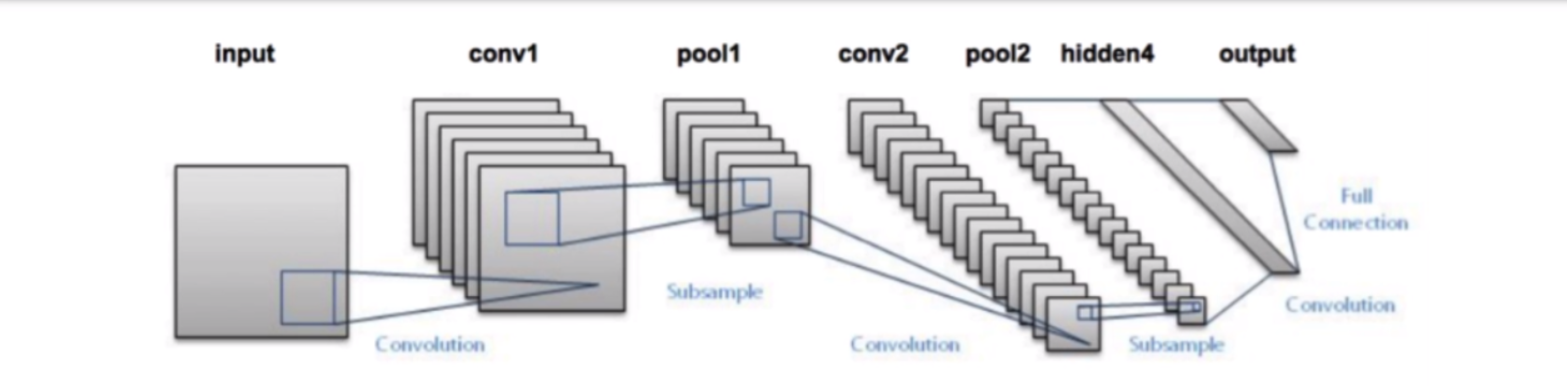


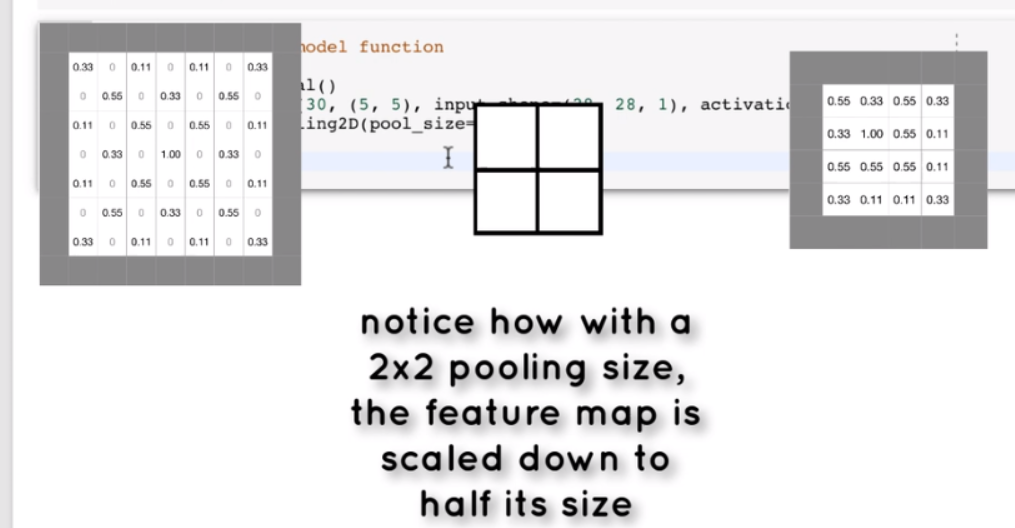



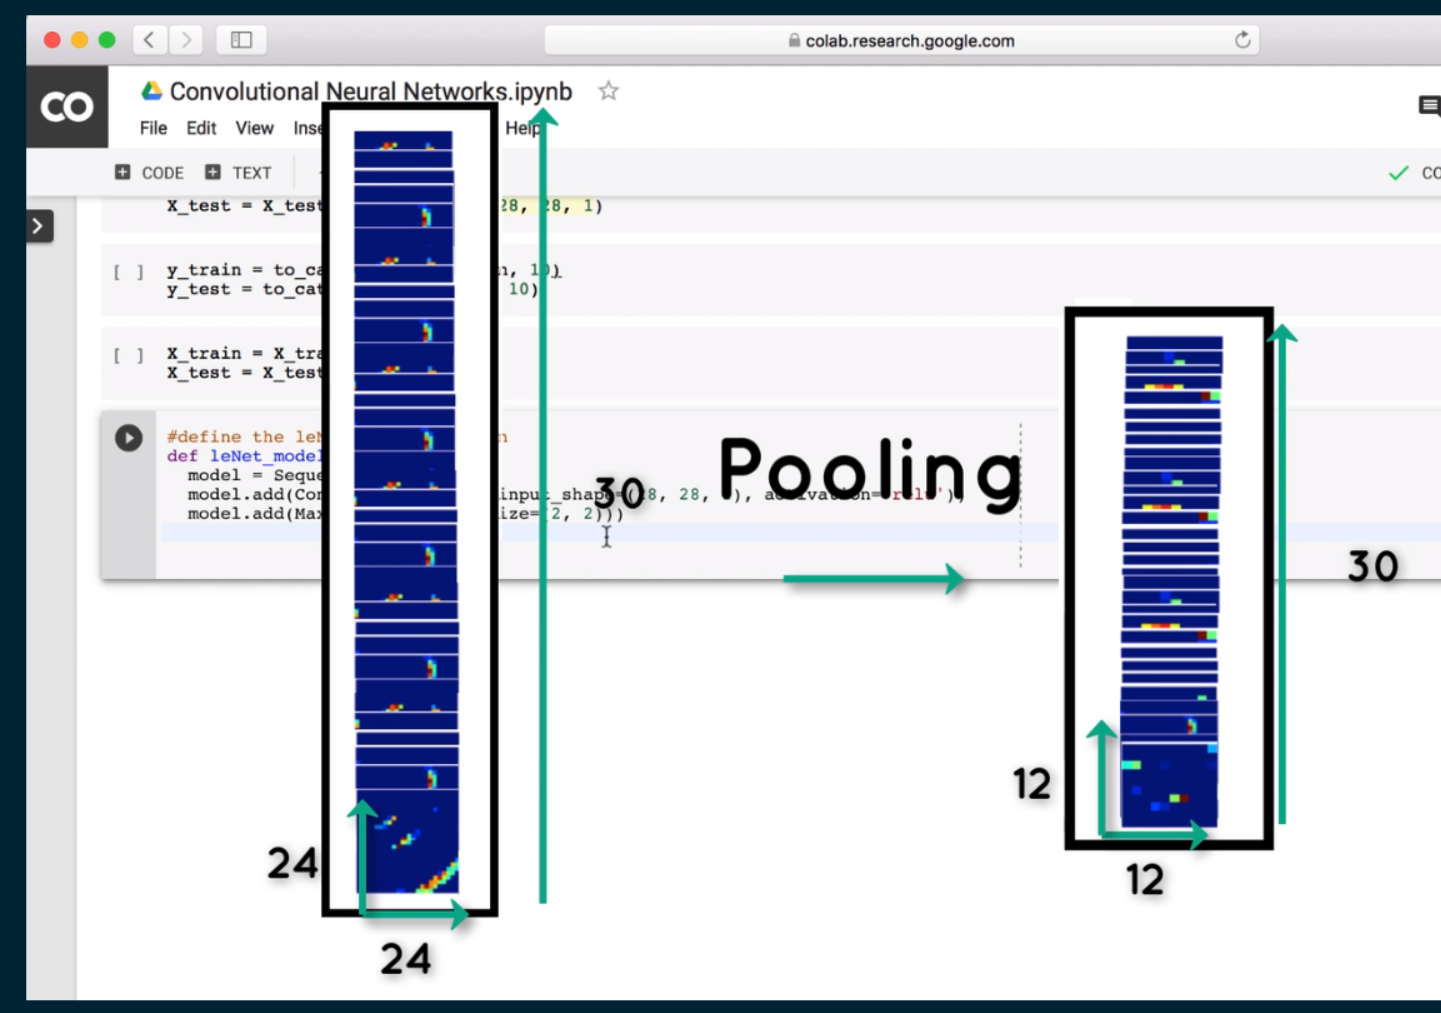

In [8]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(filters=30,kernel_size= (5,5), input_shape =(28,28,1), 
                   activation='relu', strides=(1,1), padding= 'valid'))
  model.add(MaxPooling2D(pool_size= (2, 2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size= (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=LR) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [9]:
m = leNet_model()
print(m.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

Epoch 1/10
135/135 [==============================] - 4s 18ms/step - loss: 0.2537 - accuracy: 0.9193 - val_loss: 0.0558 - val_accuracy: 0.9825
Epoch 2/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0692 - accuracy: 0.9792 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 3/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 4/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0343 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0329 - val_accuracy: 0.9905
Epoch 6/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0335 - val_accuracy: 0.9907
Epoch 7/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0410 - val_accuracy: 0.9887

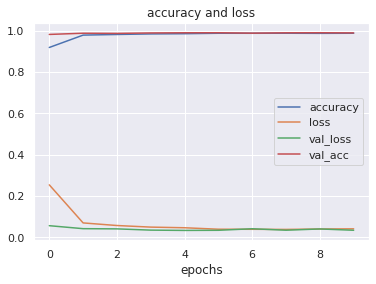

In [10]:
h = m.fit(x = X_train,y = y_train,validation_split = VS,
            verbose=1,
            batch_size = BS,
            epochs = EP,
            shuffle = 'true')
plot_controlgraphs(h, incl_validation=True)

### Test the Network with my handwritten digits

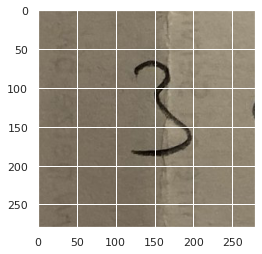

In [49]:
# url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
# url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# response = requests.get(url, stream=True)
img_raw = Image.open('3.jpeg')
plt.imshow(img_raw);

prediction for input is:[1]
[[0.1208241  0.2148131  0.07438514 0.07165471 0.06912173 0.08107994
  0.08001581 0.10313418 0.10788023 0.07709102]]


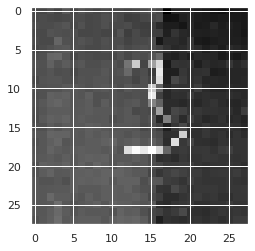

In [52]:
img_arr = np.asarray(img_raw)
img_res = cv2.resize(img_arr, (28, 28))
img_gs = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
img_rev = cv2.bitwise_not(img_gs)
plt.imshow(img_rev, cmap=plt.get_cmap('gray'))

img_norm = img_gs/255
img_reshape = img_norm.reshape(1, 28,28,1)

prediction = np.argmax(m.predict(img_reshape), axis=-1)
print(f'prediction for input is:{str(prediction)}')
print(m.predict(img_reshape))

Text(66.5, 0.5, 'real')

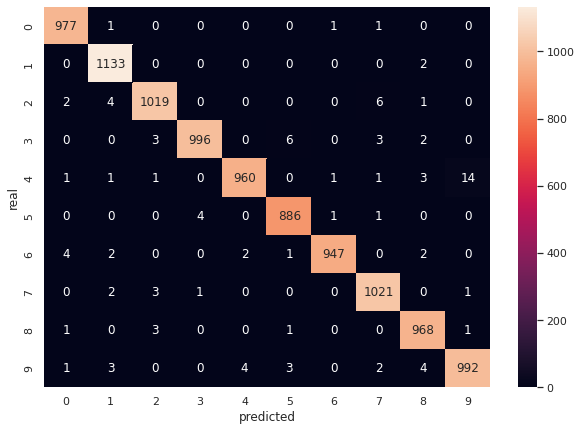

In [13]:
y_pred = m.predict(X_test)
y_pred_labels= [np.argmax(i) for i in y_pred]
#print(y_test[:5])
cm = tf.math.confusion_matrix(labels=y_test_raw, predictions=y_pred_labels)
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True, fmt='d');
plt.xlabel('predicted')
plt.ylabel('real')

In [14]:
score = m.evaluate(X_test, y_test, verbose=1)
print(m.metrics_names) #prints all metrics available by evaluate()
print(f'Test loss is: {score[0]*100:1.3}')
print(f'Test accuracy is: {score[1]*100:.2f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0317 - accuracy: 0.9899
['loss', 'accuracy']
Test loss is: 3.17
Test accuracy is: 98.99


In [48]:
!npx degit tegerte/1  -f

npx: installed 1 in 0.98s
> destination directory is not empty. Using --force, continuing
> cloned tegerte/1#HEAD
